In [171]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

In [172]:
df = pd.read_csv('Music Sales.csv', index_col=None)

In [173]:
df.shape

(2143, 25)

In [174]:
df.head()

,Album,Artist,Bytes,Sales,City,Company,Composer,Country,CustomerID,Email,...,MediaType,Milliseconds,Number of Records,Phone,PostalCode,Quantity,Region,State,Track,UnitPrice
0,Balls to the Wall,Accept,5.51M,3.96,Stuttgart,NaN,NaN,Germany,2,leonekohler@surfeu.de,...,Protected AAC audio file,342562,1,+49 0711 2842222,70174,4,Europe,NaN,Balls to the Wall,0.99
1,Restless and Wild,Accept,4.33M,3.96,Stuttgart,NaN,"F. Baltes, R.A. Smith-Diesel, S. Kaufman, U. D...",Germany,2,leonekohler@surfeu.de,...,Protected AAC audio file,252051,1,+49 0711 2842222,70174,4,Europe,NaN,Restless and Wild,0.99
2,For Those About To Rock We Salute You,AC/DC,8.60M,0.99,Oslo,NaN,"Angus Young, Malcolm Young, Brian Johnson",Norway,4,bjorn.hansen@yahoo.no,...,MPEG audio file,263288,1,+47 22 44 22 22,171,1,Europe,NaN,Breaking The Rules,0.99
3,For Those About To Rock We Salute You,AC/DC,6.85M,1.98,Oslo,NaN,"Angus Young, Malcolm Young, Brian Johnson",Norway,4,bjorn.hansen@yahoo.no,...,MPEG audio file,210834,1,+47 22 44 22 22,171,2,Europe,NaN,Inject The Venom,0.99
4,For Those About To Rock We Salute You,AC/DC,8.61M,1.98,Oslo,NaN,"Angus Young, Malcolm Young, Brian Johnson",Norway,4,bjorn.hansen@yahoo.no,...,MPEG audio file,263497,1,+47 22 44 22 22,171,2,Europe,NaN,Evil Walks,0.99


## Most popular genre in Europe and Asia.

In [175]:
df_EA=df[df['Region'].isin(['Europe', 'Asia'])].copy()

In [176]:
df_EA.shape

(1089, 25)

In [177]:
df_genre = df_EA.groupby(['Genre'])['Quantity'].sum().reset_index()
df_genre.sort_values(by=['Quantity'], ascending=False, inplace=True)

In [178]:
df_genre.head()

,Genre,Quantity
17,Rock,1284
12,Latin,472
1,Alternative & Punk,401
13,Metal,366
11,Jazz,108


Text(1000,3.5,'Top Selling Genre: Rock\nQuantity Sold: 1,284')

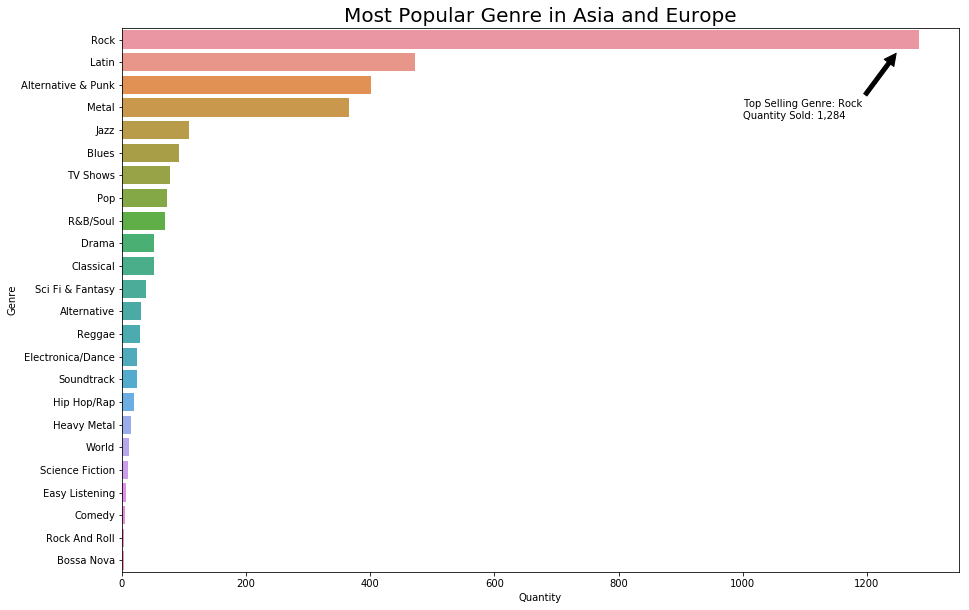

In [179]:
fig, ax = plt.subplots(figsize=(15,10))
ax = fig.gca()
sns.barplot(y='Genre', x='Quantity', data=df_genre, ax=ax)
ax.set_title('Most Popular Genre in Asia and Europe', size=20)
ax.annotate('Top Selling Genre: Rock\nQuantity Sold: 1,284', 
            xy = (1250,0.5), xytext=(1000,3.5), arrowprops=dict(facecolor='black', shrink=0.05))

The comment about the first picture:
The purpose of this picture is to convey the information about the most popular genre in Asia and Europe, what I most like is that the picture use the horizontal bar chart, it is easier for the viewers to compare and understand the information. I think the picture is good from the point of preattentive and Tufte's priciples. Depend on the preattentive process, the bar chart is easy for the viewers to compare the length, and the label on the top right corner makes the viewer so clear which genre is most popular and the Quantity sold. And depend on the Tufte Principles, I think this picture is conform to the standard of Graphical excellence which consists of complex ideas communicated with clarity, precision and efficiency.

If I have to change something, I would change the different colors to the color palettes, since this approach will naturally draw the eye to the relatively important parts of the data(depeng on the preattentive process). Here different colors is not so meaningful during to convey the purpose. Since from the label on the y-axis, the viewer can figure out the Genres. Even with the color, the viewers still need to compare the label to know what the Genre is.

Text(1000,3.5,'Top Selling Genre: Rock\nQuantity Sold: 1,284')

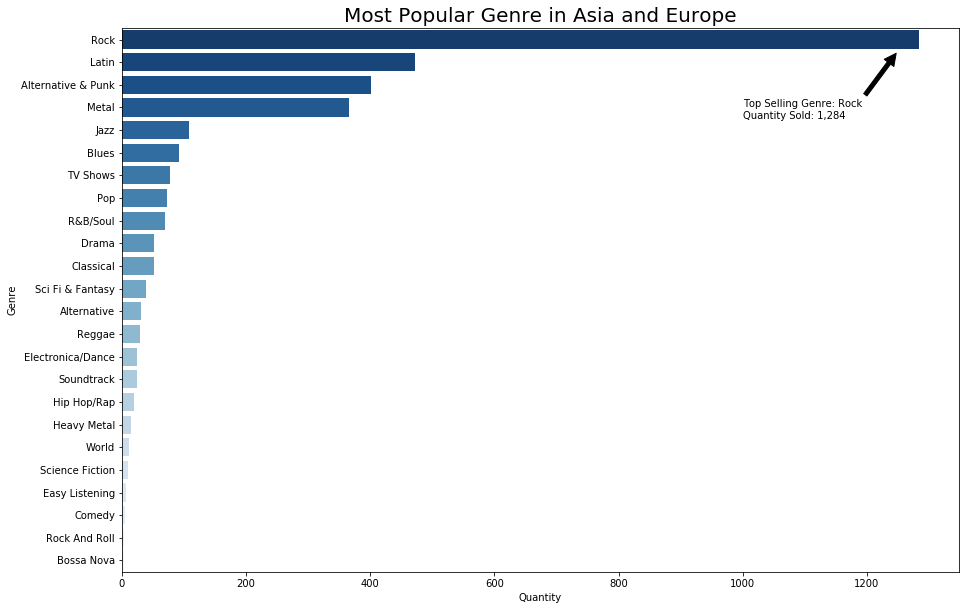

In [180]:
fig, ax = plt.subplots(figsize=(15,10))
ax = fig.gca()
sns.barplot(y='Genre', x='Quantity', palette= "Blues_r", data=df_genre, ax=ax)
ax.set_title('Most Popular Genre in Asia and Europe', size=20)
ax.annotate('Top Selling Genre: Rock\nQuantity Sold: 1,284', 
            xy = (1250,0.5), xytext=(1000,3.5), arrowprops=dict(facecolor='black', shrink=0.05))

## Top 20 Artists in Europe and Asia.

In [181]:
# get the rank of artists by quantity
df_rank = df_EA.groupby(['Artist'])['Quantity'].sum().reset_index()
df_rank['Rank'] = df_rank['Quantity'].rank(method='dense', ascending=False) 

In [182]:
# get the quantity by artists and genre
# append the rank of artists
df_rank_genre = df_EA.groupby(['Artist', 'Genre'])['Quantity'].sum().reset_index()
df_rank_genre=pd.merge(df_rank_genre, df_rank[['Artist', 'Rank']], on='Artist', how='left')
df_rank_genre.sort_values(by='Rank', inplace=True)

In [183]:
df_rank_genre.head()

,Artist,Genre,Quantity,Rank
72,Iron Maiden,Blues,9,1.0
73,Iron Maiden,Heavy Metal,15,1.0
74,Iron Maiden,Metal,120,1.0
75,Iron Maiden,Rock,79,1.0
166,U2,Rock,131,2.0


In [184]:
# reformat for plotting
df_top20 = df_rank_genre.loc[df_rank_genre['Rank'] <= 20,
                             ['Artist', 'Genre', 'Quantity']].pivot(columns='Genre',
                                                                    index='Artist',
                                                                    values='Quantity')

df_top20['total'] = df_top20.sum(axis=1)
df_top20.sort_values(by=['total', 'Artist'], ascending=[True, False], inplace=True)
df_top20.drop('total', axis=1, inplace=True)

In [185]:
df_top20.head()

Genre,Alternative & Punk,Blues,Drama,Electronica/Dance,Heavy Metal,Latin,Metal,Pop,R&B/Soul,Reggae,Rock,Sci Fi & Fantasy,Soundtrack,TV Shows
Artist,,,,,,,,,,,,,,
Eric Clapton,NaN,24.0,NaN,NaN,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Djavan,NaN,NaN,NaN,NaN,NaN,37.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Chico Buarque,NaN,NaN,NaN,NaN,NaN,38.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Battlestar Galactica (Classic),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.0,NaN,NaN
Various Artists,NaN,NaN,NaN,NaN,NaN,27.0,NaN,8.0,NaN,NaN,NaN,NaN,6.0,NaN


Text(0.5,0,'Quantity')

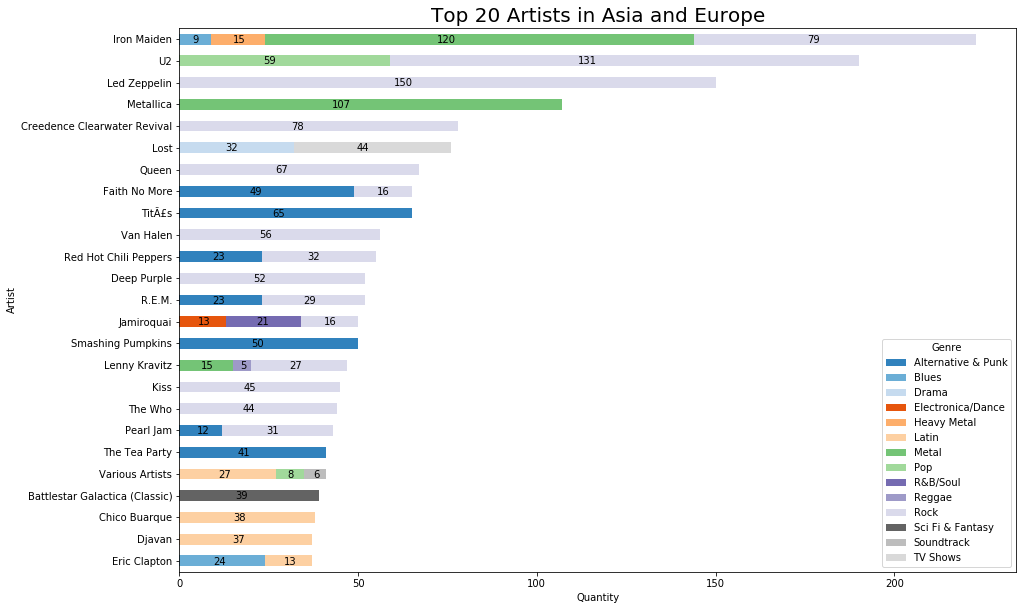

In [186]:
ax = df_top20.plot.barh(stacked=True, figsize=(15, 10), cmap=plt.cm.get_cmap('tab20c'))
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    if width > 0:
        ax.annotate(f'{width:.0f}', (p.get_x()+0.40*width,
                                     p.get_y()+.17*height), color='black', fontsize=10)
plt.title('Top 20 Artists in Asia and Europe', size=20)
plt.xlabel('Quantity')

The comment about the second picture:
The purpose of this picture is to convey the information the top 20 artists in Asia and Europe. The picture is so clear to make the viewer to understand the information. The first point I like is that the author use the horizontal stacked bar chart, it is easy to compare the total quantity and it is so clearly and effectively for us to read the graph and understand what the story talk about.This point consistent with Tufte's Graphical Excellence, which is complex ideas communicate with clarity, precision and efficiency. The second point is that use the different colors to indicate the different genres, make the viewers to understand the artist is good at which kind of music and how many kinds of music, confrom to the preattentive principle.


2 points I have some different ideas: 
First, the colors, different colors means different genres, but some colors are too close,like the grey and the very light blue, and they are so close to the white(background), the viewers need to pay extra attention to recognize what the color is, if choose some color not so close or not so light, will make the viewer to differentiate the colors much easier, it is from the preattentive point how to attract the viewers' attention easily.
Second, depend on the Tufte Principles: minimize Non-Data (high “data-ink ratio”), the purpose of the picture is to calculate the sum of the quantity of the artists, compare and find the most 20 popular artists, you use the different colors to show the genres, and the numbers on the bar to indicate the quantity of the genre looks like meaningful, but I am not sure the picture need the exact number to show the information or to compare the quantity of different genres. So it depends on the purpose of the picture, if just find the top 20 artists, I don't think we need to label the number on the bar, try to minimize the Non-data.


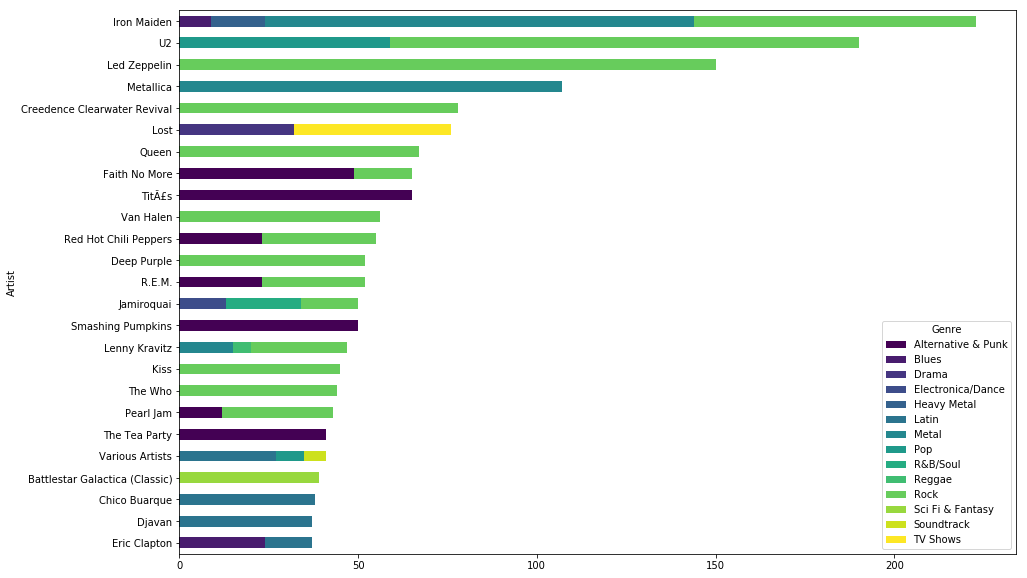

In [187]:
# Improve the plots in my opinion

ax = df_top20.plot.barh(stacked=True, figsize=(15, 10), cmap=plt.cm.get_cmap())

## Rock vs. Alternative and Punk vs. Heavy Metal.

In [188]:
# format date to month
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['InvoiceDate_year_month'] = pd.to_datetime(df['InvoiceDate']).dt.strftime("%Y-%m")

In [189]:
# subset the data needed for the plot
df_3genres=df[df['Genre'].isin(['Alternative & Punk','Heavy Metal', 'Rock'])]

In [190]:
df_3genres.shape

(1039, 26)

In [191]:
df_3genres.head()

,Album,Artist,Bytes,Sales,City,Company,Composer,Country,CustomerID,Email,...,Milliseconds,Number of Records,Phone,PostalCode,Quantity,Region,State,Track,UnitPrice,InvoiceDate_year_month
0,Balls to the Wall,Accept,5.51M,3.96,Stuttgart,NaN,NaN,Germany,2,leonekohler@surfeu.de,...,342562,1,+49 0711 2842222,70174,4,Europe,NaN,Balls to the Wall,0.99,2008-01
1,Restless and Wild,Accept,4.33M,3.96,Stuttgart,NaN,"F. Baltes, R.A. Smith-Diesel, S. Kaufman, U. D...",Germany,2,leonekohler@surfeu.de,...,252051,1,+49 0711 2842222,70174,4,Europe,NaN,Restless and Wild,0.99,2008-01
2,For Those About To Rock We Salute You,AC/DC,8.60M,0.99,Oslo,NaN,"Angus Young, Malcolm Young, Brian Johnson",Norway,4,bjorn.hansen@yahoo.no,...,263288,1,+47 22 44 22 22,171,1,Europe,NaN,Breaking The Rules,0.99,2008-01
3,For Those About To Rock We Salute You,AC/DC,6.85M,1.98,Oslo,NaN,"Angus Young, Malcolm Young, Brian Johnson",Norway,4,bjorn.hansen@yahoo.no,...,210834,1,+47 22 44 22 22,171,2,Europe,NaN,Inject The Venom,0.99,2008-01
4,For Those About To Rock We Salute You,AC/DC,8.61M,1.98,Oslo,NaN,"Angus Young, Malcolm Young, Brian Johnson",Norway,4,bjorn.hansen@yahoo.no,...,263497,1,+47 22 44 22 22,171,2,Europe,NaN,Evil Walks,0.99,2008-01


In [192]:
# get the summary
df_3genres_summary = df_3genres.groupby(['Genre', 'InvoiceDate_year_month'])['Sales'].sum().reset_index()

In [193]:
# set the template
t = pd.date_range('2008-01-01', '2012-12-31', freq='MS')
order=list(np.arange(60))*3

df_3genres_template=pd.DataFrame(list(itertools.product(['Rock','Alternative & Punk','Heavy Metal'], t)), 
                                 columns=['Genre', 'InvoiceDate'])
df_3genres_template['order']=order
df_3genres_template['InvoiceDate_year_month'] = pd.to_datetime(df_3genres_template['InvoiceDate']).dt.strftime("%Y-%m")

In [194]:
# merge the summary with the template
df_3genres_summary = pd.merge(df_3genres_template, df_3genres_summary, 
                               on=['Genre', 'InvoiceDate_year_month'], how='left')

In [195]:
df_3genres_summary.head()

,Genre,InvoiceDate,order,InvoiceDate_year_month,Sales
0,Rock,2008-01-01,0,2008-01,55.44
1,Rock,2008-02-01,1,2008-02,13.86
2,Rock,2008-03-01,2,2008-03,22.77
3,Rock,2008-04-01,3,2008-04,57.42
4,Rock,2008-05-01,4,2008-05,25.74


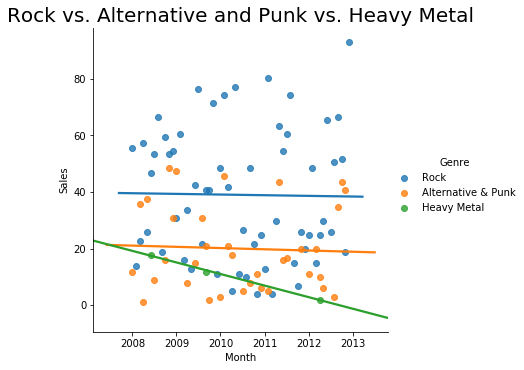

In [196]:
plt.rcParams['figure.figsize'] = (10, 10)
ax=sns.lmplot(x='order', y='Sales', hue='Genre', data=df_3genres_summary, ci=None)
plt.title('Rock vs. Alternative and Punk vs. Heavy Metal', size=20)
plt.xlabel('Month')
ax.set(xticks=np.arange(0,71,12), xticklabels=[2008, 2009, 2010, 2011, 2012, 2013])

The comment about the third picture: the author use three different colors to show different genres, and the colors are not so bright, will not distract the viewer's attention depends on the preattentive process, and it is very clear to label them on the right side. Another point what I like is that the graph use the half frame, which make the graph clearly and conform to the Tufte Principles: minimize Non-Data (high “data-ink ratio”) and avoid chart junk

One points I have different idea: the purpose of this graph is to demonstrate the change and comparison among the sales of three different genres based on time, I think it’s not so clearly and directly to show the reader if use the regression line. And the spots on the background against the Tufte Principles: minimize Non-Data (high “data-ink ratio”), although the spots are meaningful, but not so effective, so I think it is better to use line chart, will make the reader easily to read the result.
 

C:\MSDA\anaconda\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\MSDA\anaconda\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\MSDA\anaconda\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-cop

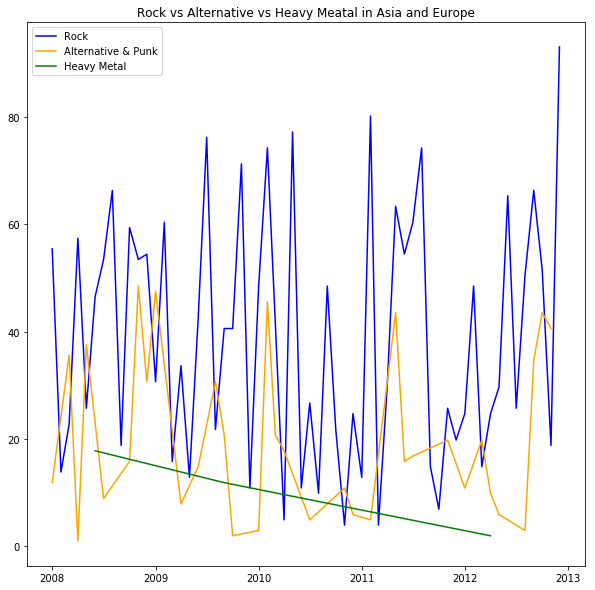

In [197]:
import numpy as np

# subset the data needed for the plot
df_3genres=df[df['Genre'].isin(['Alternative & Punk','Heavy Metal', 'Rock'])]
df_3genres['InvoiceDate'] = pd.to_datetime(df_3genres['InvoiceDate'])
df_3genres['Year'] = df_3genres['InvoiceDate'].dt.year
df_3genres['YearMonth'] = df_3genres['InvoiceDate'].apply(lambda x: x.strftime('%Y-%m')) 

# get the sum of the sales group by Genre first then by YearMonth
df_3genres_group = df_3genres.groupby(['Genre', 'YearMonth'])['Sales'].sum()
#print(df_3genres_group)
#print(df_3genres_group['Rock'])

# check the number of data in the different genres
df_3genres[['Genre', 'YearMonth']][df_3genres.Genre == 'Alternative & Punk']
df_3genres[['Genre', 'YearMonth']][df_3genres.Genre == 'Rock']
df_3genres[['Genre', 'YearMonth']][df_3genres.Genre == 'Heavy Metal']

fig, ax = plt.subplots(figsize=(10,10))

yearMonth = np.array(df_3genres_group['Rock'].index, dtype='datetime64')
ax.plot(yearMonth,df_3genres_group['Rock'].values,'Blue')

yearMonth1 = np.array(df_3genres_group['Alternative & Punk'].index, dtype='datetime64')
ax.plot(yearMonth1, df_3genres_group['Alternative & Punk'].values,'Orange')

yearMonth3 = np.array(df_3genres_group['Heavy Metal'].index, dtype='datetime64')
ax.plot(yearMonth3, df_3genres_group['Heavy Metal'].values,'Green')

plt.legend(('Rock', 'Alternative & Punk', 'Heavy Metal'),
           loc='upper left')
plt.title('Rock vs Alternative vs Heavy Meatal in Asia and Europe')

plt.show()

